## Import packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure, show
import seaborn as sns
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)
output_notebook()

def get_year(date):
    x = re.match('[0-9]{4}', date)
    if x :
      return(x.group())

Loading BokehJS ...

In [2]:
hdb_test = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\hdb_test.csv")
hdb_train = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\hdb_train.csv")

In [3]:
print(hdb_test.shape)
print(hdb_train.shape)

(3766, 14)
(759992, 15)


In [4]:
#priv_test = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\private_test.csv")
#priv_train = pd.read_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\datasets\private_train.csv")

In [5]:
#print(priv_test.shape)
#print(priv_train.shape)

In [6]:
#priv_train.contract_date.value_counts()

## Exploring dataset

In [7]:
hdb_train.head(4)

,index,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,11
1,1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,5
2,2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,11
3,3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,8


In [8]:
hdb_train.street_name.value_counts()

YISHUN RING RD            15217
BEDOK RESERVOIR RD        12973
ANG MO KIO AVE 10         12287
ANG MO KIO AVE 3          10769
HOUGANG AVE 8              8194
TAMPINES ST 21             7398
BEDOK NTH ST 3             6705
ANG MO KIO AVE 4           6445
BEDOK NTH RD               6329
MARSILING DR               5921
JURONG WEST ST 42          5797
ANG MO KIO AVE 5           5726
SIMEI ST 1                 4911
JURONG EAST ST 21          4604
LOR 1 TOA PAYOH            4595
BT BATOK WEST AVE 6        4517
CIRCUIT RD                 4462
TAMPINES ST 22             4453
YISHUN ST 11               4371
YISHUN ST 21               4371
ANG MO KIO AVE 1           4324
JURONG WEST ST 81          4214
YISHUN ST 61               4211
JURONG WEST ST 52          4139
BISHAN ST 13               4136
UBI AVE 1                  4130
CLEMENTI AVE 4             4112
YISHUN ST 81               4073
WOODLANDS ST 13            4028
TECK WHYE LANE             3972
                          ...  
SELETAR 

## Visualizing price and xx variables
Describing general trends
- floor: higher floors, higher price
- higher floor_area_sqm, higher price
- older lease_commerce_date, lower price

However, it is hard to distill the trends with time factored into it.

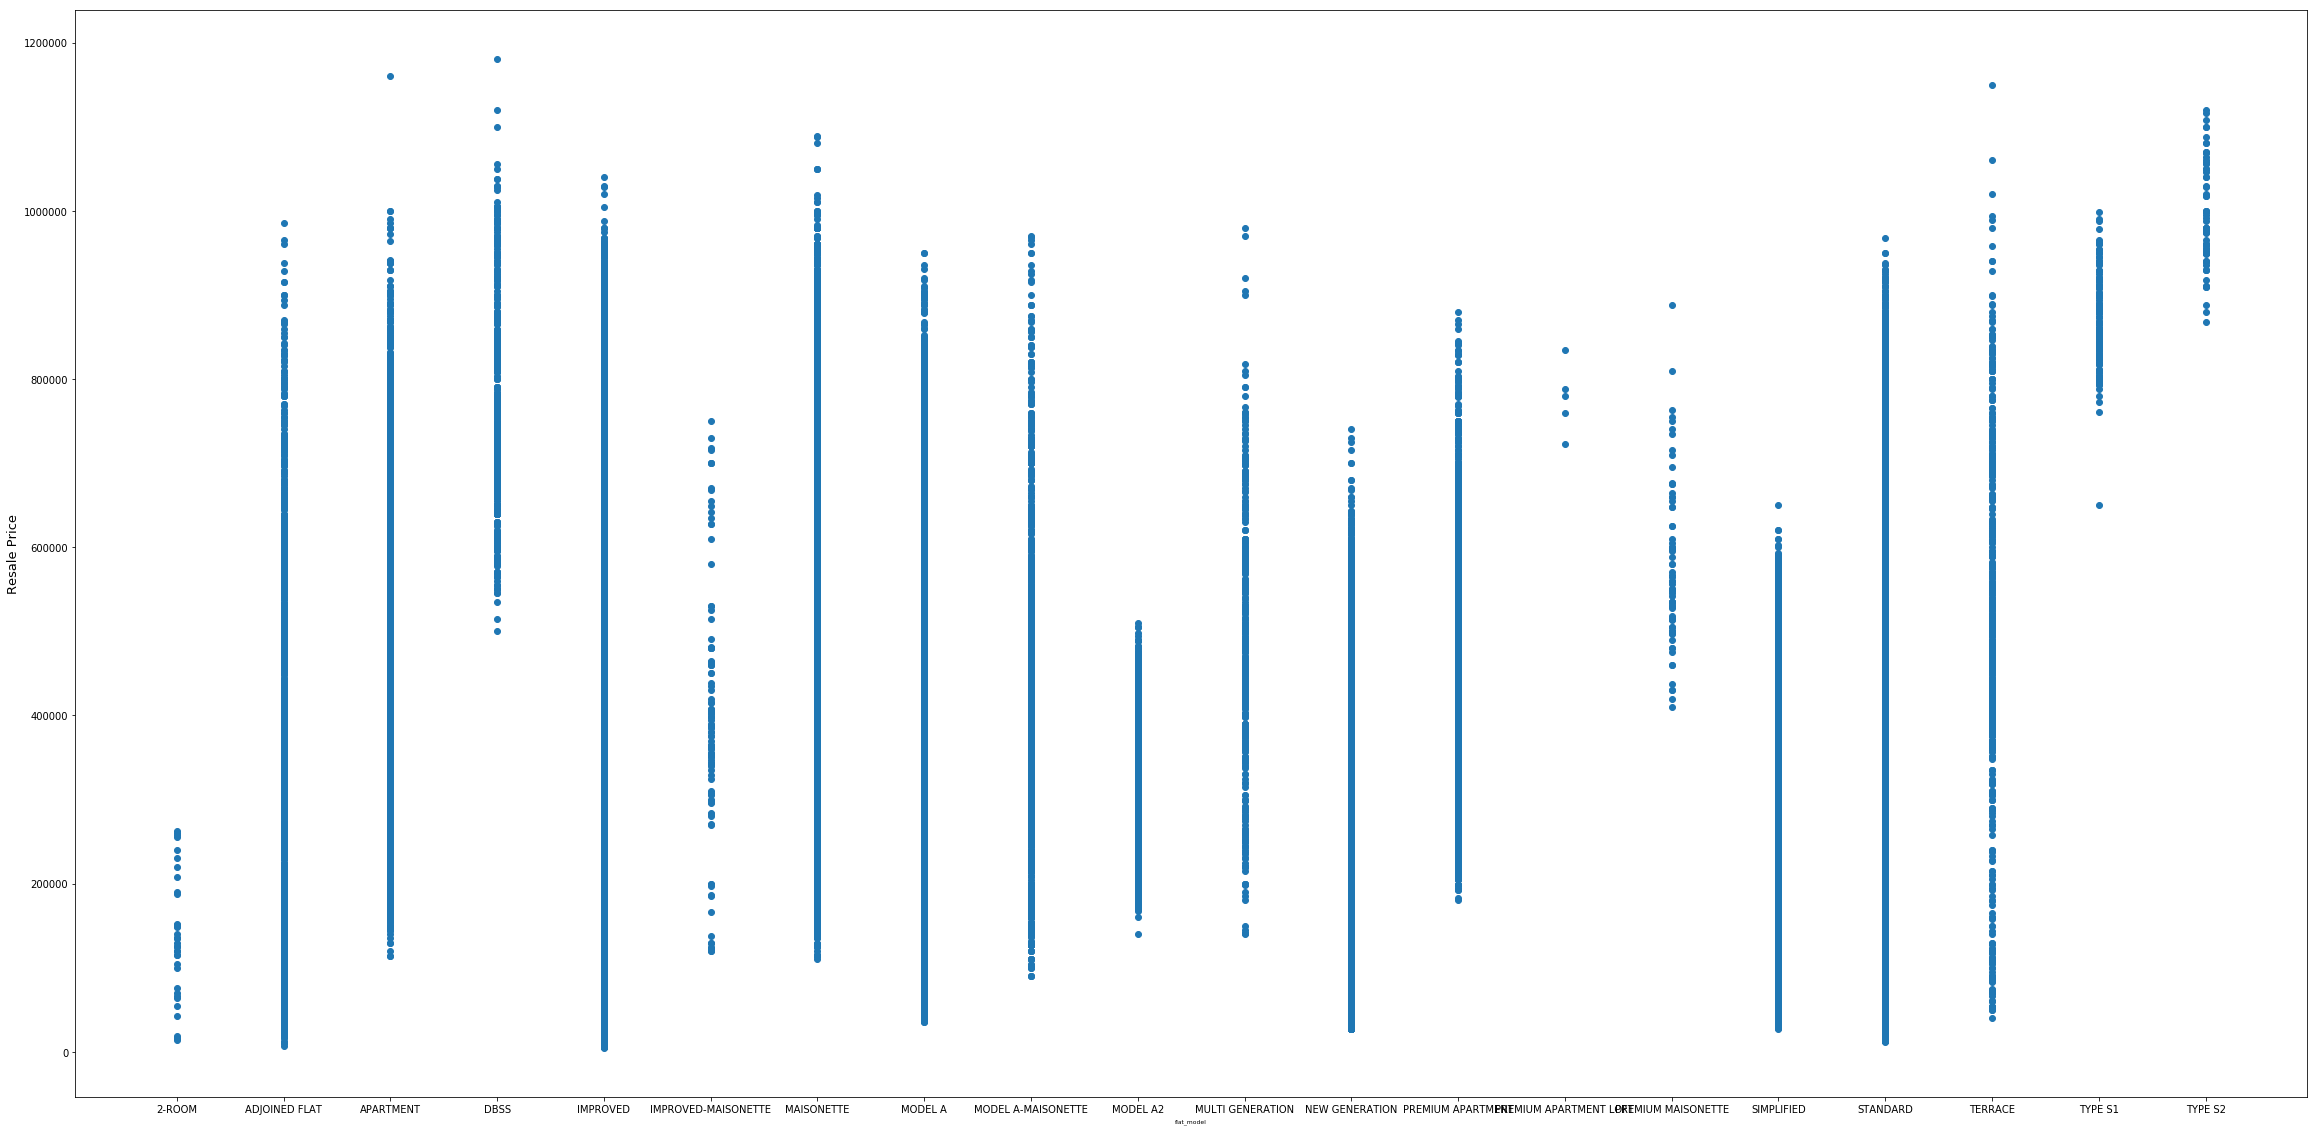

In [9]:
xhead = 'flat_model'
fig, ax = plt.subplots(figsize=(40, 20))
ax.scatter(x =hdb_train[xhead], y = hdb_train.resale_price)
plt.ylabel('Resale Price', fontsize = 13)
plt.xlabel(xhead, fontsize = 6)
plt.show()

## Cleaning
Features need to be extracted from the variables.
No missing data.

In [10]:
# Block should be treated as categorical
hdb_train.block = hdb_train.block.apply(str)
hdb_test.block = hdb_test.block.apply(str)

# flat_model should be treated as categorical
hdb_train.flat_model = hdb_train.flat_model.apply(str)
hdb_test.flat_model = hdb_test.flat_model.apply(str)

# flat_type should be treated as categorical
hdb_train.flat_type = hdb_train.flat_type.apply(str)
hdb_test.flat_type = hdb_test.flat_type.apply(str)

# storey_range should be treated as categorical
hdb_train.storey_range = hdb_train.storey_range.apply(str)
hdb_test.storey_range = hdb_test.storey_range.apply(str)

# street_name and town should be treated as cateorical
hdb_train.street_name = hdb_train.street_name.apply(str)
hdb_test.street_name = hdb_test.street_name.apply(str)
hdb_train.town = hdb_train.town.apply(str)
hdb_test.town = hdb_test.town.apply(str)

# postal_code should be treated as categorical
hdb_train.postal_code = hdb_train.postal_code.apply(str)
hdb_test.postal_code = hdb_test.postal_code.apply(str)

In [11]:
hdb_train.month.head(4)

0    1990-01
1    1990-01
2    1990-01
3    1990-01
Name: month, dtype: object

In [12]:
# Extracting the year sold
hdb_train['year_sold'] = hdb_train.month.apply(get_year)
hdb_test['year_sold'] = hdb_test.month.apply(get_year)

In [13]:
# Create a new feature: age of apartment
hdb_train['age_apartment'] = hdb_train.year_sold.apply(int).subtract(hdb_train.lease_commence_date)
hdb_test['age_apartment'] = hdb_test.year_sold.apply(int).subtract(hdb_test.lease_commence_date)

# year_sold should be treated as categorical
hdb_train.year_sold = hdb_train.year_sold.apply(str)
hdb_test.year_sold = hdb_test.year_sold.apply(str)

# lease_commence_date should be treated as categorical
hdb_train.lease_commence_date = hdb_train.lease_commence_date.apply(str)
hdb_test.lease_commence_date = hdb_test.lease_commence_date.apply(str)


## Exploring latitude longitude
By playing around the different year_sold, different resale_price cutoff, I came to several conclusion
- Prices have definitely changed a lot across the years and we must take into account 
- There are distinct clusters of lat, long on the map. (~17 to 20 of them)

Decides to use 20 clusters after looking at kmeans results for clusters from 15 to 20.

In [14]:
print(hdb_train.latitude.max())
print(hdb_train.latitude.min())
print(hdb_train.longitude.max())
print(hdb_train.longitude.min())

1.45707121614
1.27037951176
103.987804503
103.685228418


In [15]:
print(hdb_train[hdb_train.year_sold == '2017'].resale_price.min())
print(hdb_train[hdb_train.year_sold == '2017'].resale_price.max())

175000.0
1180000.0


In [16]:
p = figure(title="price based on geography", y_range=(1.27, 1.46), x_range = (103.68, 103.99))
p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'
lowLat=hdb_train['latitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price < 400000]
lowLong=hdb_train['longitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price < 400000]
medLat=hdb_train['latitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price <= 600000][hdb_train.resale_price >= 400000]
medLong=hdb_train['longitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price <= 600000][hdb_train.resale_price >= 400000]
highLat=hdb_train['latitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price > 600000]
highLong=hdb_train['longitude'][hdb_train.year_sold == '2017'][hdb_train.resale_price > 600000]
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')
show(p, notebook_handle=True)

In [17]:
from sklearn.cluster import KMeans

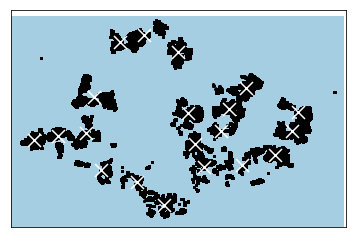

In [18]:
X=pd.concat([hdb_train['latitude'],hdb_train['longitude']],axis=1)
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
X2 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
result = pd.concat([X, X2], axis=1)
y_min, y_max = result['latitude'].min() - 0.01, result['latitude'].max() + 0.01
x_min, x_max = result['longitude'].min() - 0.01, result['longitude'].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(result['longitude'],result['latitude'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [19]:
hdb_train["cluster"] = kmeans.predict(hdb_train.loc[:,['latitude','longitude']])
hdb_test["cluster"] = kmeans.predict(hdb_test.loc[:,['latitude','longitude']])

In [20]:
# cluster should be treated as categorical
hdb_train.cluster = pd.Series(hdb_train.cluster).apply(str)
hdb_test.cluster = pd.Series(hdb_test.cluster).apply(str)

## Encoding categorical variables

In [21]:
from sklearn.preprocessing import LabelEncoder
hdb_train.head(4)

,index,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor,year_sold,age_apartment,cluster
0,0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,11,1990,13,12
1,1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,5,1990,13,12
2,2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,11,1990,13,12
3,3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO,1.365029,103.8453,562309,8,1990,13,12


In [22]:
hdb_train_id = hdb_train['index']
hdb_test_id = hdb_test['index']
hdb_train_price = hdb_train['resale_price']

hdb_train = hdb_train.drop(['index', 'month','latitude', 'longitude', 'resale_price'], axis=1)
hdb_test = hdb_test.drop(['index', 'month','latitude', 'longitude'], axis=1)


In [23]:
hdb_train.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date     object
storey_range            object
street_name             object
town                    object
postal_code             object
floor                    int64
year_sold               object
age_apartment            int64
cluster                 object
dtype: object

In [24]:
le = LabelEncoder()
cat_var = ["block", "flat_model", "flat_type", "lease_commence_date", "storey_range", "street_name", "town", "postal_code", \
          "year_sold", "cluster"]

for i in range(len(cat_var)):
    le.fit(np.hstack((hdb_train[cat_var[i]],hdb_test[cat_var[i]])))
    hdb_train[cat_var[i]] = le.transform(hdb_train[cat_var[i]])
    hdb_test[cat_var[i]] = le.transform(hdb_test[cat_var[i]])



In [25]:
#hdb_test.floor_area_sqm = hdb_test.floor_area_sqm.apply(int)

In [26]:
hdb_train.dtypes

block                    int64
flat_model               int64
flat_type                int64
floor_area_sqm         float64
lease_commence_date      int64
storey_range             int64
street_name              int64
town                     int64
postal_code              int64
floor                    int64
year_sold                int64
age_apartment            int64
cluster                  int64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
hdb_train_x, hdb_val_x, hdb_train_y, hdb_val_y = train_test_split(hdb_train, hdb_train_price, test_size=0.15, random_state = 123)

In [28]:
hdb_train_x.shape

(645993, 13)

## Building Model Arc

In [29]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


## Final model for HDB

In [34]:
main_input = Input(shape = (13,), name = 'main_input')
emb = Embedding(256*8, output_dim = 64, input_length = 13)(main_input)
conv1d = Conv1D(filters = 32, kernel_size = 3, padding = 'valid')(emb)
bn = BatchNormalization()(conv1d)
sgconv1d = Activation('sigmoid')(bn)
#conv = Multiply()([conv1d, sgconv1d])
#pool = MaxPooling1D(pool_size = 32)(conv)
out = Flatten()(sgconv1d)
out = Dense(512, activation = 'relu')(out)
out = Dense(256, activation = 'relu')(out)

loss = Dense(1, activation = 'linear')(out)

model = Model(inputs = [main_input], outputs = [loss])
model.compile(loss='mean_absolute_percentage_error', optimizer = 'Adam', \
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [35]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
history = model.fit(hdb_train_x, hdb_train_y, validation_data = (hdb_val_x, hdb_val_y), epochs = 200,\
          batch_size = 128, callbacks=[learning_rate_reduction])

Train on 645993 samples, validate on 113999 samples
Epoch 1/200
645993/645993 [==============================] - 40s 62us/step - loss: 14.6502 - mean_squared_error: 5823166382.0161 - mean_absolute_percentage_error: 14.6502 - val_loss: 7.6228 - val_mean_squared_error: 917412405.5932 - val_mean_absolute_percentage_error: 7.6228
Epoch 2/200
645993/645993 [==============================] - 39s 60us/step - loss: 7.5314 - mean_squared_error: 826240853.3357 - mean_absolute_percentage_error: 7.5314 - val_loss: 7.3102 - val_mean_squared_error: 746680488.0655 - val_mean_absolute_percentage_error: 7.3102
Epoch 3/200
645993/645993 [==============================] - 39s 61us/step - loss: 7.1175 - mean_squared_error: 689590933.4856 - mean_absolute_percentage_error: 7.1175 - val_loss: 6.9052 - val_mean_squared_error: 640953581.5808 - val_mean_absolute_percentage_error: 6.9052
Epoch 4/200
645993/645993 [==============================] - 39s 60us/step - loss: 6.8848 - mean_squared_error: 624224321.0612

Epoch 31/200
645993/645993 [==============================] - 39s 61us/step - loss: 6.0508 - mean_squared_error: 440254949.5836 - mean_absolute_percentage_error: 6.0508 - val_loss: 6.2191 - val_mean_squared_error: 461895078.4259 - val_mean_absolute_percentage_error: 6.2191
Epoch 32/200
645993/645993 [==============================] - 39s 61us/step - loss: 6.0387 - mean_squared_error: 437759327.5776 - mean_absolute_percentage_error: 6.0387 - val_loss: 6.2118 - val_mean_squared_error: 455911406.3928 - val_mean_absolute_percentage_error: 6.2118
Epoch 33/200
645993/645993 [==============================] - 39s 61us/step - loss: 6.0299 - mean_squared_error: 437187007.2693 - mean_absolute_percentage_error: 6.0299 - val_loss: 6.2054 - val_mean_squared_error: 461188567.9250 - val_mean_absolute_percentage_error: 6.2054
Epoch 34/200
645993/645993 [==============================] - 39s 61us/step - loss: 6.0184 - mean_squared_error: 435838481.9245 - mean_absolute_percentage_error: 6.0184 - val_los

645993/645993 [==============================] - 39s 60us/step - loss: 5.6171 - mean_squared_error: 391739541.2827 - mean_absolute_percentage_error: 5.6171 - val_loss: 6.1355 - val_mean_squared_error: 440730281.8867 - val_mean_absolute_percentage_error: 6.1355
Epoch 88/200
645993/645993 [==============================] - 39s 61us/step - loss: 5.6150 - mean_squared_error: 391526058.9806 - mean_absolute_percentage_error: 5.6150 - val_loss: 6.1433 - val_mean_squared_error: 441288719.5839 - val_mean_absolute_percentage_error: 6.1433
Epoch 89/200
645993/645993 [==============================] - 39s 61us/step - loss: 5.6144 - mean_squared_error: 391576014.2247 - mean_absolute_percentage_error: 5.6144 - val_loss: 6.1398 - val_mean_squared_error: 439924589.4884 - val_mean_absolute_percentage_error: 6.1398
Epoch 90/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.6133 - mean_squared_error: 391428727.1519 - mean_absolute_percentage_error: 5.6133 - val_loss: 6.1359 - v

Epoch 117/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5743 - mean_squared_error: 388113067.9638 - mean_absolute_percentage_error: 5.5743 - val_loss: 6.1497 - val_mean_squared_error: 444867007.8995 - val_mean_absolute_percentage_error: 6.1497
Epoch 118/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5733 - mean_squared_error: 388164281.0920 - mean_absolute_percentage_error: 5.5733 - val_loss: 6.1463 - val_mean_squared_error: 439192317.8504 - val_mean_absolute_percentage_error: 6.1463
Epoch 119/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5714 - mean_squared_error: 387952455.1940 - mean_absolute_percentage_error: 5.5714 - val_loss: 6.1513 - val_mean_squared_error: 441441352.8882 - val_mean_absolute_percentage_error: 6.1513
Epoch 120/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5700 - mean_squared_error: 388352859.6989 - mean_absolute_percentage_error: 5.5700 - val

Epoch 147/200
645993/645993 [==============================] - 38s 59us/step - loss: 5.5351 - mean_squared_error: 385089505.8781 - mean_absolute_percentage_error: 5.5351 - val_loss: 6.1634 - val_mean_squared_error: 445195543.8728 - val_mean_absolute_percentage_error: 6.1634
Epoch 148/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5331 - mean_squared_error: 384848654.5670 - mean_absolute_percentage_error: 5.5331 - val_loss: 6.1616 - val_mean_squared_error: 442253236.3845 - val_mean_absolute_percentage_error: 6.1616
Epoch 149/200
645993/645993 [==============================] - 38s 60us/step - loss: 5.5325 - mean_squared_error: 384834343.4796 - mean_absolute_percentage_error: 5.5325 - val_loss: 6.1590 - val_mean_squared_error: 441110266.5257 - val_mean_absolute_percentage_error: 6.1590
Epoch 150/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.5304 - mean_squared_error: 384576550.2963 - mean_absolute_percentage_error: 5.5304 - val

Epoch 177/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.4960 - mean_squared_error: 381959792.3710 - mean_absolute_percentage_error: 5.4960 - val_loss: 6.1730 - val_mean_squared_error: 444559039.3965 - val_mean_absolute_percentage_error: 6.1730
Epoch 178/200
645993/645993 [==============================] - 39s 60us/step - loss: 5.4962 - mean_squared_error: 382082488.4175 - mean_absolute_percentage_error: 5.4962 - val_loss: 6.1700 - val_mean_squared_error: 442679546.3887 - val_mean_absolute_percentage_error: 6.1700
Epoch 179/200
645993/645993 [==============================] - 39s 61us/step - loss: 5.4948 - mean_squared_error: 381595208.2202 - mean_absolute_percentage_error: 5.4948 - val_loss: 6.1767 - val_mean_squared_error: 443389729.2651 - val_mean_absolute_percentage_error: 6.1767
Epoch 180/200
645993/645993 [==============================] - 40s 61us/step - loss: 5.4911 - mean_squared_error: 381431593.8153 - mean_absolute_percentage_error: 5.4911 - val

In [36]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'loss', 'mean_squared_error', 'mean_absolute_percentage_error', 'lr'])


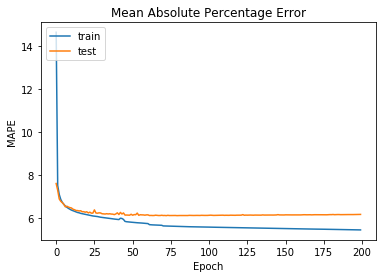

In [37]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Mean Absolute Percentage Error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions

In [92]:
hdb_out = model.predict(hdb_test)

In [108]:
hdb_out =pd.DataFrame(data={'index': hdb_test_id,'price': hdb_out.ravel()})

In [109]:
hdb_out.to_csv(r"C:\Users\nhanw\OneDrive\Desktop\leeweesun_kaggle_2\outputs\hdb_out.csv", index =False)

# Appendix

## Model 2
Epoch 99/1000
645993/645993 [==============================] - 62s 96us/step - loss: 6.0961 - mean_squared_error: 464837569.6288 - mean_absolute_percentage_error: 6.0961 - val_loss: 6.5706 - val_mean_squared_error: 536080689.8831 - val_mean_absolute_percentage_error: 6.5706

In [75]:
main_input = Input(shape = (13,), name = 'main_input')
emb = Embedding(256*6, output_dim = 64, input_length = 13)(main_input)
conv1d = Conv1D(filters = 32, kernel_size = 3, padding = 'valid', activation = 'relu')(emb)
sgconv1d = Activation('sigmoid')(conv1d)
#conv = Multiply()([conv1d, sgconv1d])
#pool = MaxPooling1D(pool_size = 32)(conv)
out = Flatten()(sgconv1d)
out = Dense(512, activation = 'relu')(out)
out = Dense(256, activation = 'relu')(out)

loss = Dense(1, activation = 'linear')(out)

model = Model(inputs = [main_input], outputs = [loss])
model.compile(loss='mean_absolute_percentage_error', optimizer = 'Adam', \
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [76]:
model.fit(hdb_train_x, hdb_train_y, validation_data = (hdb_val_x, hdb_val_y), epochs = 1000, batch_size = 64)

Train on 645993 samples, validate on 113999 samples
Epoch 1/1000
645993/645993 [==============================] - 63s 98us/step - loss: 21.5677 - mean_squared_error: 9133790203.1889 - mean_absolute_percentage_error: 21.5677 - val_loss: 10.6973 - val_mean_squared_error: 2311544052.2115 - val_mean_absolute_percentage_error: 10.6973
Epoch 2/1000
645993/645993 [==============================] - 61s 94us/step - loss: 9.5215 - mean_squared_error: 1688345054.6148 - mean_absolute_percentage_error: 9.5215 - val_loss: 8.6145 - val_mean_squared_error: 1254708458.1337 - val_mean_absolute_percentage_error: 8.6145
Epoch 3/1000
645993/645993 [==============================] - 62s 96us/step - loss: 8.2988 - mean_squared_error: 1141414230.6203 - mean_absolute_percentage_error: 8.2988 - val_loss: 7.9347 - val_mean_squared_error: 1031987105.5565 - val_mean_absolute_percentage_error: 7.9347
Epoch 4/1000
645993/645993 [==============================] - 60s 93us/step - loss: 7.7675 - mean_squared_error: 951

Epoch 60/1000
645993/645993 [==============================] - 59s 91us/step - loss: 6.2167 - mean_squared_error: 495404927.7432 - mean_absolute_percentage_error: 6.2167 - val_loss: 6.5484 - val_mean_squared_error: 540800086.7595 - val_mean_absolute_percentage_error: 6.5484
Epoch 61/1000
645993/645993 [==============================] - 58s 90us/step - loss: 6.2108 - mean_squared_error: 494004698.9598 - mean_absolute_percentage_error: 6.2108 - val_loss: 6.5544 - val_mean_squared_error: 537455161.5828 - val_mean_absolute_percentage_error: 6.5544
Epoch 62/1000
645993/645993 [==============================] - 59s 91us/step - loss: 6.2067 - mean_squared_error: 492537840.3976 - mean_absolute_percentage_error: 6.2067 - val_loss: 6.5782 - val_mean_squared_error: 537585380.9047 - val_mean_absolute_percentage_error: 6.5782
Epoch 63/1000
645993/645993 [==============================] - 58s 90us/step - loss: 6.1965 - mean_squared_error: 491813507.4782 - mean_absolute_percentage_error: 6.1965 - val

Epoch 90/1000
645993/645993 [==============================] - 62s 96us/step - loss: 6.1178 - mean_squared_error: 469906653.1335 - mean_absolute_percentage_error: 6.1178 - val_loss: 6.5819 - val_mean_squared_error: 545462306.6914 - val_mean_absolute_percentage_error: 6.5819
Epoch 91/1000
645993/645993 [==============================] - 60s 93us/step - loss: 6.1143 - mean_squared_error: 469222515.0036 - mean_absolute_percentage_error: 6.1143 - val_loss: 6.5482 - val_mean_squared_error: 521103894.4549 - val_mean_absolute_percentage_error: 6.5482
Epoch 92/1000
645993/645993 [==============================] - 61s 94us/step - loss: 6.1138 - mean_squared_error: 468815452.4689 - mean_absolute_percentage_error: 6.1138 - val_loss: 6.5317 - val_mean_squared_error: 520302207.2763 - val_mean_absolute_percentage_error: 6.5317
Epoch 93/1000
645993/645993 [==============================] - 60s 93us/step - loss: 6.1117 - mean_squared_error: 467946598.9207 - mean_absolute_percentage_error: 6.1117 - val

KeyboardInterrupt: 

## Model 1
Epoch 745/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.2212 - mean_squared_error: 1643956606.4225 - mean_absolute_percentage_error: 9.2212 - val_loss: 10.5971 - val_mean_squared_error: 1631406850.4668 - val_mean_absolute_percentage_error: 10.5971

In [65]:
main_input = Input(shape = (13,), name = 'main_input')
emb = Embedding(256*4, output_dim = 16, input_length = 13)(main_input)
conv1d = Conv1D(filters = 32, kernel_size = 3, padding = 'valid', activation = 'relu')(emb)
sgconv1d = Activation('sigmoid')(conv1d)
#conv = Multiply()([conv1d, sgconv1d])
#pool = MaxPooling1D(pool_size = 32)(conv)
out = Flatten()(sgconv1d)
out = Dense(512, activation = 'relu')(out)
out = Dense(256, activation = 'relu')(out)

loss = Dense(1, activation = 'linear')(out)

model = Model(inputs = [main_input], outputs = [loss])
model.compile(loss='mean_absolute_percentage_error', optimizer = 'Adam', \
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])


In [71]:
model.fit(hdb_train_x, hdb_train_y, validation_data = (hdb_val_x, hdb_val_y), epochs = 1000, batch_size = 64)

Train on 645993 samples, validate on 113999 samples
Epoch 1/1000
645993/645993 [==============================] - 59s 91us/step - loss: 11.4886 - mean_squared_error: 2610999902.5950 - mean_absolute_percentage_error: 11.4886 - val_loss: 11.3814 - val_mean_squared_error: 2615499254.5380 - val_mean_absolute_percentage_error: 11.3814
Epoch 2/1000
645993/645993 [==============================] - 59s 92us/step - loss: 11.4925 - mean_squared_error: 2605599403.4131 - mean_absolute_percentage_error: 11.4925 - val_loss: 11.4153 - val_mean_squared_error: 2582912895.8434 - val_mean_absolute_percentage_error: 11.4153
Epoch 3/1000
645993/645993 [==============================] - 59s 92us/step - loss: 11.4441 - mean_squared_error: 2594766653.4157 - mean_absolute_percentage_error: 11.4441 - val_loss: 11.3815 - val_mean_squared_error: 2524391125.1109 - val_mean_absolute_percentage_error: 11.3815
Epoch 4/1000
645993/645993 [==============================] - 59s 92us/step - loss: 11.4412 - mean_squared_e

645993/645993 [==============================] - 58s 91us/step - loss: 11.1886 - mean_squared_error: 2479740682.4735 - mean_absolute_percentage_error: 11.1886 - val_loss: 11.2415 - val_mean_squared_error: 2575625568.5387 - val_mean_absolute_percentage_error: 11.2415
Epoch 31/1000
645993/645993 [==============================] - 58s 90us/step - loss: 11.2182 - mean_squared_error: 2483874053.0487 - mean_absolute_percentage_error: 11.2182 - val_loss: 11.7569 - val_mean_squared_error: 2527624423.1394 - val_mean_absolute_percentage_error: 11.7569
Epoch 32/1000
645993/645993 [==============================] - 58s 91us/step - loss: 11.1661 - mean_squared_error: 2469973926.6217 - mean_absolute_percentage_error: 11.1661 - val_loss: 11.2353 - val_mean_squared_error: 2431017980.8634 - val_mean_absolute_percentage_error: 11.2353
Epoch 33/1000
645993/645993 [==============================] - 58s 90us/step - loss: 11.2267 - mean_squared_error: 2478325204.4696 - mean_absolute_percentage_error: 11.226

645993/645993 [==============================] - 58s 90us/step - loss: 10.7997 - mean_squared_error: 2298798345.5109 - mean_absolute_percentage_error: 10.7997 - val_loss: 11.9039 - val_mean_squared_error: 2177112125.3322 - val_mean_absolute_percentage_error: 11.9039
Epoch 89/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.7700 - mean_squared_error: 2294119042.4390 - mean_absolute_percentage_error: 10.7700 - val_loss: 13.3675 - val_mean_squared_error: 2200250312.1733 - val_mean_absolute_percentage_error: 13.3675
Epoch 90/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.8001 - mean_squared_error: 2297740522.9777 - mean_absolute_percentage_error: 10.8001 - val_loss: 10.9032 - val_mean_squared_error: 2250197046.9038 - val_mean_absolute_percentage_error: 10.9032
Epoch 91/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.7832 - mean_squared_error: 2291957308.0717 - mean_absolute_percentage_error: 10.783

645993/645993 [==============================] - 58s 89us/step - loss: 10.4632 - mean_squared_error: 2167879781.6309 - mean_absolute_percentage_error: 10.4632 - val_loss: 10.6382 - val_mean_squared_error: 2021088062.8741 - val_mean_absolute_percentage_error: 10.6382
Epoch 147/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.4449 - mean_squared_error: 2161192209.6234 - mean_absolute_percentage_error: 10.4449 - val_loss: 11.0772 - val_mean_squared_error: 2381852477.9924 - val_mean_absolute_percentage_error: 11.0772
Epoch 148/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.4327 - mean_squared_error: 2158390735.7482 - mean_absolute_percentage_error: 10.4327 - val_loss: 11.7761 - val_mean_squared_error: 2073610504.0279 - val_mean_absolute_percentage_error: 11.7761
Epoch 149/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.4781 - mean_squared_error: 2160383622.1717 - mean_absolute_percentage_error: 10.

645993/645993 [==============================] - 58s 89us/step - loss: 10.2188 - mean_squared_error: 2061224978.7651 - mean_absolute_percentage_error: 10.2188 - val_loss: 11.2582 - val_mean_squared_error: 2006252956.5962 - val_mean_absolute_percentage_error: 11.2582
Epoch 205/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.2117 - mean_squared_error: 2053565931.2210 - mean_absolute_percentage_error: 10.2117 - val_loss: 11.0119 - val_mean_squared_error: 2073367283.6296 - val_mean_absolute_percentage_error: 11.0119
Epoch 206/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.2355 - mean_squared_error: 2058799216.8457 - mean_absolute_percentage_error: 10.2355 - val_loss: 10.6560 - val_mean_squared_error: 1963374380.4807 - val_mean_absolute_percentage_error: 10.6560
Epoch 207/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.2303 - mean_squared_error: 2056334308.8940 - mean_absolute_percentage_error: 10.

645993/645993 [==============================] - 58s 89us/step - loss: 10.0189 - mean_squared_error: 1979365629.1590 - mean_absolute_percentage_error: 10.0189 - val_loss: 10.6093 - val_mean_squared_error: 2000420335.4862 - val_mean_absolute_percentage_error: 10.6093
Epoch 263/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.0521 - mean_squared_error: 1983780062.8268 - mean_absolute_percentage_error: 10.0521 - val_loss: 11.1735 - val_mean_squared_error: 1927851009.2188 - val_mean_absolute_percentage_error: 11.1735
Epoch 264/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.0296 - mean_squared_error: 1974314374.2534 - mean_absolute_percentage_error: 10.0296 - val_loss: 10.4295 - val_mean_squared_error: 1914893330.4047 - val_mean_absolute_percentage_error: 10.4295
Epoch 265/1000
645993/645993 [==============================] - 58s 90us/step - loss: 10.0254 - mean_squared_error: 1973989821.4752 - mean_absolute_percentage_error: 10.

645993/645993 [==============================] - 58s 89us/step - loss: 9.8986 - mean_squared_error: 1916933749.2601 - mean_absolute_percentage_error: 9.8986 - val_loss: 10.2485 - val_mean_squared_error: 2003854729.0516 - val_mean_absolute_percentage_error: 10.2485
Epoch 321/1000
645993/645993 [==============================] - 57s 89us/step - loss: 9.9042 - mean_squared_error: 1916437715.8914 - mean_absolute_percentage_error: 9.9042 - val_loss: 10.1266 - val_mean_squared_error: 1907459584.1488 - val_mean_absolute_percentage_error: 10.1266
Epoch 322/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.8494 - mean_squared_error: 1911866873.8264 - mean_absolute_percentage_error: 9.8494 - val_loss: 11.3452 - val_mean_squared_error: 2213445595.6833 - val_mean_absolute_percentage_error: 11.3452
Epoch 323/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.8696 - mean_squared_error: 1911427033.7795 - mean_absolute_percentage_error: 9.8696 - v

645993/645993 [==============================] - 58s 90us/step - loss: 9.7753 - mean_squared_error: 1862364413.0346 - mean_absolute_percentage_error: 9.7753 - val_loss: 10.1659 - val_mean_squared_error: 2001784609.9248 - val_mean_absolute_percentage_error: 10.1659
Epoch 379/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.7253 - mean_squared_error: 1854266304.2886 - mean_absolute_percentage_error: 9.7253 - val_loss: 10.6034 - val_mean_squared_error: 1863967958.7727 - val_mean_absolute_percentage_error: 10.6034
Epoch 380/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.7170 - mean_squared_error: 1851727714.4725 - mean_absolute_percentage_error: 9.7170 - val_loss: 12.2233 - val_mean_squared_error: 1878197674.4307 - val_mean_absolute_percentage_error: 12.2233
Epoch 381/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.7044 - mean_squared_error: 1848408144.6526 - mean_absolute_percentage_error: 9.7044 - v

645993/645993 [==============================] - 57s 89us/step - loss: 9.6234 - mean_squared_error: 1808571249.8324 - mean_absolute_percentage_error: 9.6234 - val_loss: 10.1058 - val_mean_squared_error: 1877000044.9096 - val_mean_absolute_percentage_error: 10.1058
Epoch 437/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.6318 - mean_squared_error: 1810893731.5247 - mean_absolute_percentage_error: 9.6318 - val_loss: 11.5491 - val_mean_squared_error: 1793944438.7208 - val_mean_absolute_percentage_error: 11.5491
Epoch 438/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.6459 - mean_squared_error: 1813395504.0619 - mean_absolute_percentage_error: 9.6459 - val_loss: 10.1840 - val_mean_squared_error: 1928355276.8484 - val_mean_absolute_percentage_error: 10.1840
Epoch 439/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.6491 - mean_squared_error: 1811569914.9691 - mean_absolute_percentage_error: 9.6491 - v

645993/645993 [==============================] - 58s 90us/step - loss: 9.5427 - mean_squared_error: 1771068447.4819 - mean_absolute_percentage_error: 9.5427 - val_loss: 10.0104 - val_mean_squared_error: 1845424204.0821 - val_mean_absolute_percentage_error: 10.0104
Epoch 495/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.5195 - mean_squared_error: 1768161185.2969 - mean_absolute_percentage_error: 9.5195 - val_loss: 10.4256 - val_mean_squared_error: 1709698989.5476 - val_mean_absolute_percentage_error: 10.4256
Epoch 496/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.5336 - mean_squared_error: 1767529945.6024 - mean_absolute_percentage_error: 9.5336 - val_loss: 10.1443 - val_mean_squared_error: 1925462832.0066 - val_mean_absolute_percentage_error: 10.1443
Epoch 497/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.5147 - mean_squared_error: 1766703046.5801 - mean_absolute_percentage_error: 9.5147 - v

645993/645993 [==============================] - 58s 90us/step - loss: 9.4407 - mean_squared_error: 1733154008.6909 - mean_absolute_percentage_error: 9.4407 - val_loss: 10.5921 - val_mean_squared_error: 1745351125.5435 - val_mean_absolute_percentage_error: 10.5921
Epoch 553/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.4311 - mean_squared_error: 1732806329.3254 - mean_absolute_percentage_error: 9.4311 - val_loss: 11.3219 - val_mean_squared_error: 1718996564.6388 - val_mean_absolute_percentage_error: 11.3219
Epoch 554/1000
645993/645993 [==============================] - 59s 91us/step - loss: 9.4296 - mean_squared_error: 1730984923.5737 - mean_absolute_percentage_error: 9.4296 - val_loss: 9.9206 - val_mean_squared_error: 1740580101.2598 - val_mean_absolute_percentage_error: 9.9206
Epoch 555/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.4368 - mean_squared_error: 1735589532.4171 - mean_absolute_percentage_error: 9.4368 - val

645993/645993 [==============================] - 58s 89us/step - loss: 9.3637 - mean_squared_error: 1701350822.6122 - mean_absolute_percentage_error: 9.3637 - val_loss: 10.0300 - val_mean_squared_error: 1754498192.3159 - val_mean_absolute_percentage_error: 10.0300
Epoch 611/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.3797 - mean_squared_error: 1704064923.0646 - mean_absolute_percentage_error: 9.3797 - val_loss: 11.4210 - val_mean_squared_error: 1747624182.6413 - val_mean_absolute_percentage_error: 11.4210
Epoch 612/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.3546 - mean_squared_error: 1703782592.8240 - mean_absolute_percentage_error: 9.3546 - val_loss: 11.0351 - val_mean_squared_error: 1705978606.9332 - val_mean_absolute_percentage_error: 11.0351
Epoch 613/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.3852 - mean_squared_error: 1703386092.3184 - mean_absolute_percentage_error: 9.3852 - v

645993/645993 [==============================] - 58s 89us/step - loss: 9.2862 - mean_squared_error: 1675981390.2058 - mean_absolute_percentage_error: 9.2862 - val_loss: 9.8309 - val_mean_squared_error: 1658499854.4686 - val_mean_absolute_percentage_error: 9.8309
Epoch 669/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.2821 - mean_squared_error: 1671136331.0211 - mean_absolute_percentage_error: 9.2821 - val_loss: 9.7856 - val_mean_squared_error: 1672438164.0664 - val_mean_absolute_percentage_error: 9.7856
Epoch 670/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.2817 - mean_squared_error: 1673715460.1618 - mean_absolute_percentage_error: 9.2817 - val_loss: 10.2571 - val_mean_squared_error: 1695516053.0525 - val_mean_absolute_percentage_error: 10.2571
Epoch 671/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.2786 - mean_squared_error: 1671275808.5607 - mean_absolute_percentage_error: 9.2786 - val_l

645993/645993 [==============================] - 58s 89us/step - loss: 9.2163 - mean_squared_error: 1645596132.8383 - mean_absolute_percentage_error: 9.2163 - val_loss: 10.1977 - val_mean_squared_error: 1627712807.1341 - val_mean_absolute_percentage_error: 10.1977
Epoch 727/1000
645993/645993 [==============================] - 58s 89us/step - loss: 9.2358 - mean_squared_error: 1647112373.9627 - mean_absolute_percentage_error: 9.2358 - val_loss: 9.8171 - val_mean_squared_error: 1707387686.5502 - val_mean_absolute_percentage_error: 9.8171
Epoch 728/1000
645993/645993 [==============================] - 58s 90us/step - loss: 9.2320 - mean_squared_error: 1649264329.8588 - mean_absolute_percentage_error: 9.2320 - val_loss: 9.8105 - val_mean_squared_error: 1668123012.9480 - val_mean_absolute_percentage_error: 9.8105
Epoch 729/1000
645993/645993 [==============================] - 59s 91us/step - loss: 9.2276 - mean_squared_error: 1649176952.4809 - mean_absolute_percentage_error: 9.2276 - val_l

KeyboardInterrupt: 